In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
%matplotlib inline

In [90]:
stocks = ['NEE']
data = yf.download(stocks, start='2014-01-01', interval='1mo')['Adj Close']
print(data.head())

[*********************100%%**********************]  1 of 1 completed

Date
2014-01-01    17.502354
2014-02-01    17.399549
2014-03-01    18.350063
2014-04-01    19.161825
2014-05-01    18.683983
Name: Adj Close, dtype: float64


<Axes: xlabel='Date'>

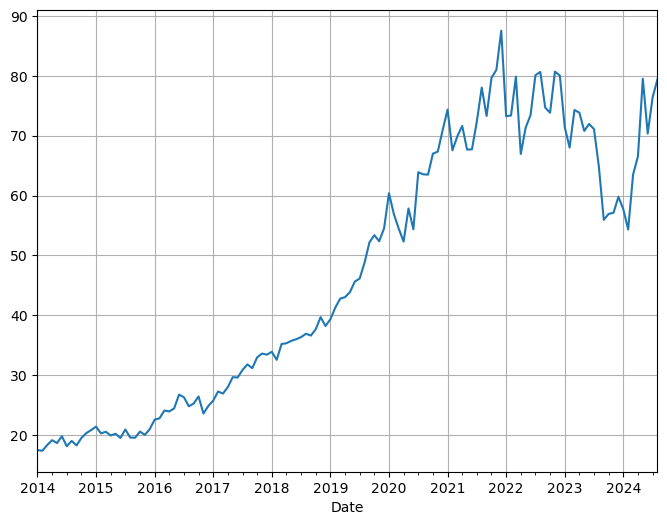

In [91]:
data.plot(figsize=(8, 6),
            grid=True)

Estas graficas tienen de similitud una tendencia alcista y coinciden en algunos puntos, aun que de 2017 a 2019 tuvo una divergencia, el oro tuvo una caida de 2 years al iniciar la pandemia mientras que la company electrica tuvo un buen crecimiento hasta finales de 2022 donde alcanzo su maximo historico de este rango de fechas.


In [92]:
piv_index = getattr(data.index, 'year')
piv_season = getattr(data.index, 'month')
piv= pd.pivot_table(data, index=piv_index, columns=piv_season, values= data)
piv.plot(figsize=(12,8))

KeyError: 17.50235366821289

Aqui podemos observar que los mejores meses que sube el precio por accion de la company son los meses de junio a agosto. Pero por lo general todos los meses fueron con tendencia alcista.

In [ ]:
piv= pd.pivot_table(data, index=piv_season, columns=piv_index, values=data)
piv.plot(figsize=(12,8))

In [ ]:
piv.boxplot()
plt.xticks([])

Aqui observamos que entre mas pasa el tiempo los valores oscilan dentro de un mayor rango.

In [ ]:
from pandas.plotting import lag_plot

In [ ]:
lag_plot(data, lag=12)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

In [ ]:
plot_acf(data, lags=24)

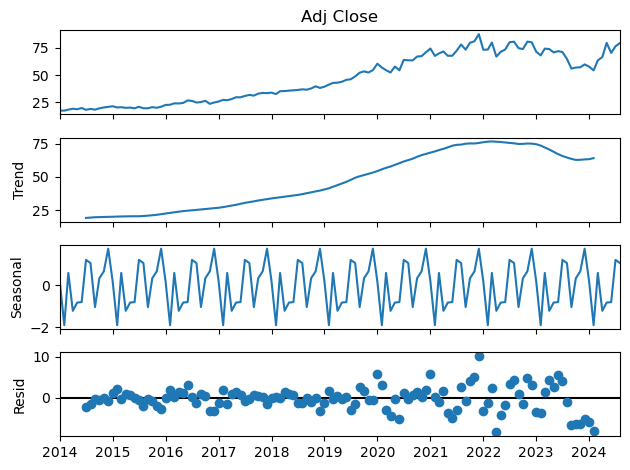

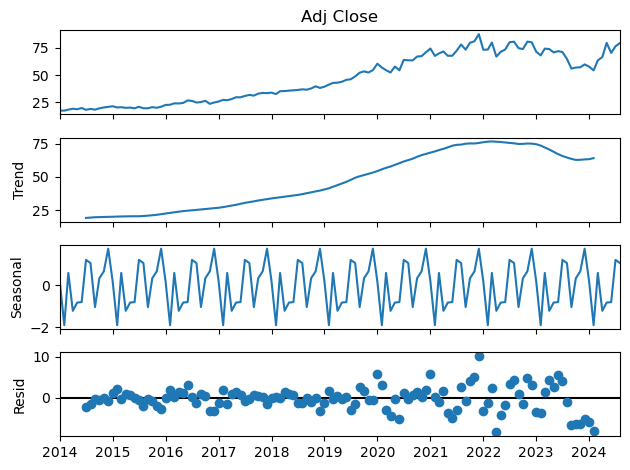

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
result = seasonal_decompose(data, model='additive')
result.plot()

Observamos una tendencia alcista, con una gran volatilidad por estacion y conforme mas pasa el tiempo en Resid los puntos de probabilidad van aumentando su distancia.

<Axes: xlabel='Date'>

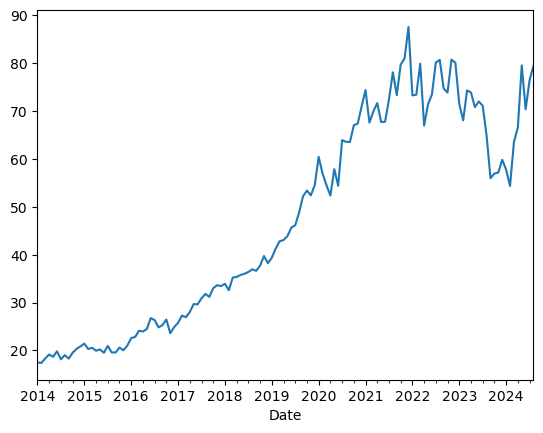

In [96]:
data.plot()

In [99]:
result.seasonal

Date
2014-01-01    0.180564
2014-02-01   -1.891533
2014-03-01    0.585694
2014-04-01   -1.211111
2014-05-01   -0.820312
                ...   
2024-04-01   -1.211111
2024-05-01   -0.820312
2024-06-01   -0.796619
2024-07-01    1.204250
2024-08-01    1.053783
Name: seasonal, Length: 128, dtype: float64

In [101]:
stl= STL(data)

In [102]:
res = stl.fit()

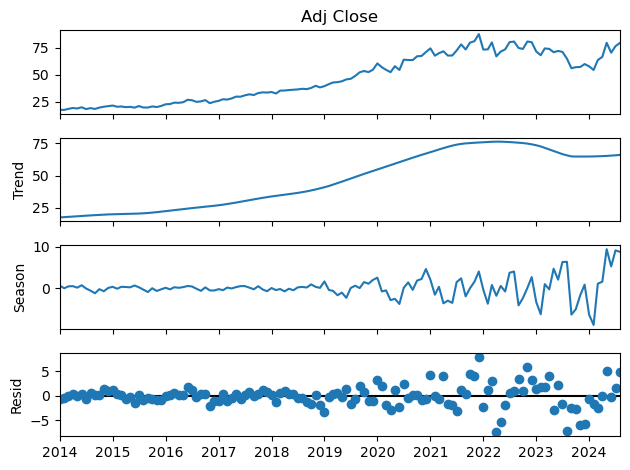

In [103]:
fig=res.plot()

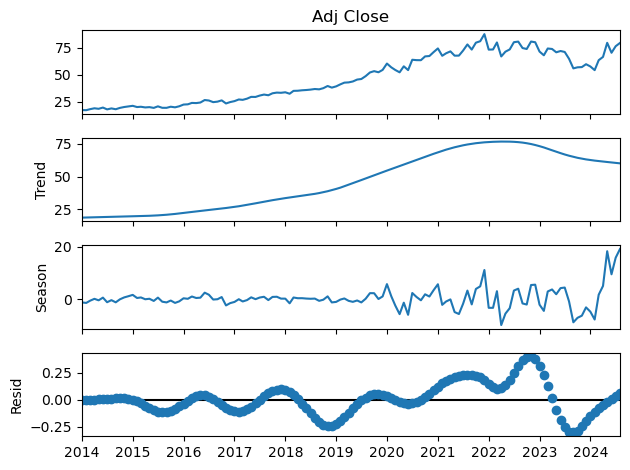

In [105]:
stl = STL(data, seasonal=3, trend=13)
res =stl.fit()
fig = res.plot()


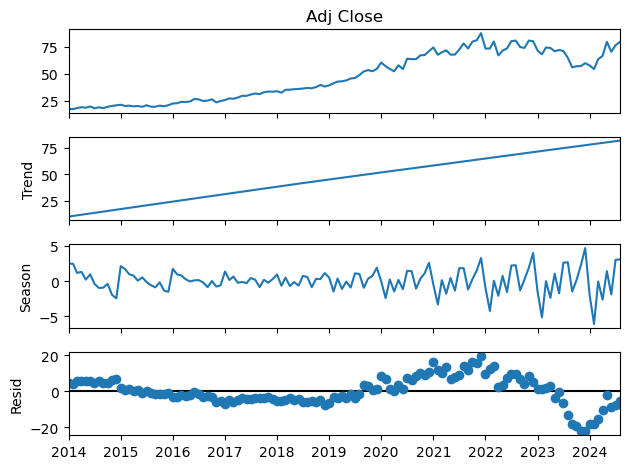

In [110]:
stl = STL(data, seasonal=23, trend=213)
res =stl.fit()
fig = res.plot()

Aqui vemos un cambio mas abrupto en la tendencia lo que provoca un cambio en las otras 2, tomando valores mas lejanos, tanto como la estacion como los residuales son cambiantes lograms ver que con el paso del tiempo difieren. 

In [111]:
data.describe()

count    128.000000
mean      46.885577
std       21.881078
min       17.399549
25%       25.182257
50%       43.459200
75%       67.799723
max       87.526680
Name: Adj Close, dtype: float64

In [112]:
data.skew()

0.13784601466317295

In [113]:
data.kurtosis()

-1.5140712164863268

In [114]:
data

Date
2014-01-01    17.502354
2014-02-01    17.399549
2014-03-01    18.350063
2014-04-01    19.161825
2014-05-01    18.683983
                ...    
2024-04-01    66.538994
2024-05-01    79.504997
2024-06-01    70.354271
2024-07-01    76.389999
2024-08-01    79.410004
Name: Adj Close, Length: 128, dtype: float64

<Axes: >

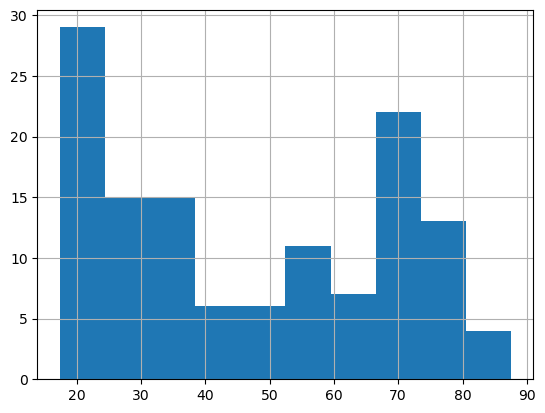

In [116]:
data.hist()